<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 1) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Data Summary](#summary)**
2. **[Missing Values](#missing_values)**
    - 2.1 - **[Standard Missing Values](#std_mv)**
    - 2.2 - **[Non-Standard Missing Values](#non_std_mv)**
3. **[Handle Non-Numeric Data](#cat)**
    - 3.1 - [One-Hot Encoding (Using Pandas)](#pandas)
    - 3.2 - [One-Hot Encoding (Using Sklearn)](#onehot)
    - 3.3 - [Label Encoding (Using Sklearn)](#label)
    - 3.4 - [Ordinal Encoding (Using Sklearn)](#ord)
    - 3.5 - [Frequency Encoding (Using Sklearn)](#freq)
4. **[Scale the Data](#norm)**
    - 4.1 - [StandardScaler](#stdscale)
    - 4.2 - [Min-Max Normalization](#minmax)
5. **[Transformation Techniques](#trans)**
   - 5.1 - [Log Transformation](#log)
   - 5.2 - [Exponential Transformation](#expo) 
6. **[Outliers](#outliers)** 
    - 6.1 - **[Based on Boxplot](#boxplot)**
    - 6.2 - **[Based on IQR](#iqr)**
    - 6.3 - **[Based on Z-score](#zscore)**
    - 6.4 - **[Based on Scatter plot](#scatter)**
7. **[Feature Engineering](#feature_engineering)**
8. **[Introduction to Train and Test Split](#train_test_split)**

In the past sessions, we have covered topics such as:
<ol>
    <li>Check for inconsistencies</li>
    <li>Scaling data</li>
    <li>Check for linear relationships</li>
    <li>Transformation techniques</li>
    <li>Handling categorical data</li>
    </ol>
 
In this session, we shall know more about missing values - detection and treatment. Along with it, we shall study outlier detection and treatment.

We shall use the `bigmartsales` dataset. The data description is as follows:

**Item_Identifier:** Unique product ID assigned to every distinct item

**Item_Weight:** Weight of the product

**Item_Fat_Content:** Describes whether the product is low in fat or not

**Item_Visibility:** Total display area allocated to the particular product (in %)

**Item_Type:** Describes the food category to which the item belongs

**Item_MRP:** Maximum Retail Price (list price) of the product

**Outlet_Identifier:** Unique store ID assigned. It consists of an alphanumeric string of length 6

**Outlet_Establishment_Year:** The establishment year of the store

**Outlet_Size:** Size of the store in terms of ground area covered

**Outlet_Location_Type:** Size of the city in which the store is located

**Outlet_Type:** Is the outlet just a grocery store or a supermarket

**Profit:** Profit of the item sold (in %)

**Item_Outlet_Sales**: Sales of the product (target variable)

In [1]:
# import pandas
import pandas as pd

# read the data
df_sales = pd.read_csv("bigmartsales-cleaned.csv")

# check first five rows of data
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


<a id="summary"></a>
## 1. Data Summary

Let us first check the summary of the dataset

In [2]:
# summary of all the variable in the dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7774 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         6473 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Profit                       8523 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


**Interpretation:** The data set has 13 variables out of which 6 are numerical, and 7 are categorical. All the variables do not contain null values, this output is based on the entries in each column.

**The statistical summary of numeric variables:**

In [3]:
# summary of numeric variables
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


**Interpretation:** The variable representing the weight of the product sold has a minimum of 0, which is absurd. It implies the data has missing values where the value `0` is present. For a numeric variable, python does not consider the `0` value as a missing value. <br>
Also, for the variable representing item visibility, has minimum value zero. It indicates that the variable has missing data. A customer needs to know the product before purchase.

**The statistical summary of categorical variables:**

In [4]:
# get the summary output for categorical variable
df_sales.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


**Interpretation:** Note that the variables representing outlet size and type of outlet location have counts less than 8523 (the number of observations in the data). It implies that there are missing values in the two variables.

<a id='missing_values'></a>
## 2. Missing values

The missing data, or missing values, are values which occur when no data is stored for the variable in an observation. Understanding the concept of missing values is important in order to successfully manage data. Missing data often occur in data and needs to be handled properly. Improper handling may affect results obtained by the researcher.

<a id = "std_mv"></a>
## 2.1 Standard missing values

The missing values which are detected by python are called standard missing values in python. The missing values detected by python include `NaN` and blank spaces ` `.

<a id="non_std_mv"></a>
## 2.2 Non-Standard missing values

The missing values such as `?`, `-` , `NA` are not detected by python and are known as the non-standard missing values.

**From the statistical summary, we got a rough idea of the missing values. Let us do a simple check for missing values.**

In [5]:
# check for null values using isnull()
# isnull(): returns true for a missing data
# values: returns a list of boolean values (output of isnull()) 
# any() returns true if any of the element in the passed list is true
df_sales.isnull().values.any()

True

**Interpretation:** The above is a simple way to know the presence of missing data. However, it is not possible to know the variables containing missing data.

In [6]:
# use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df_sales.isnull().sum()

# print the missing values
missing_values

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

Let us plot a heatmap of the missing values.

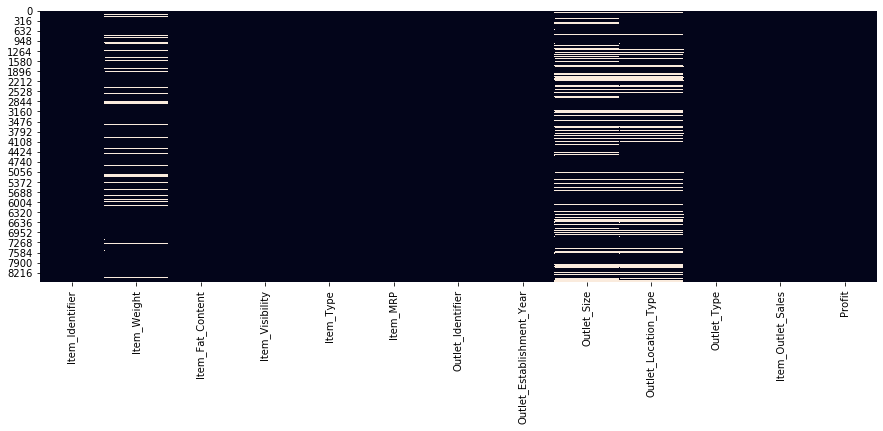

In [7]:
# let us plot a heatmap of the missing values

# import the required libraries
# import the library seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df_sales.isnull(), cbar = False)

# display the plot
plt.show()

We see that there are three variables that have missing data. Let us find the percentage of missing data in each variable. Also note that, we have seen variable `Item_Visibility` has missing values represented by 0, and are not detected by python.

In [8]:
# get the count of missing values
missing_values = df_sales.isnull().sum()

# check for missing values
total = df_sales.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df_sales.isnull().sum()/df_sales.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df_sales[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
Outlet_Size,2410,28.276428,object
Outlet_Location_Type,2050,24.052564,object
Item_Weight,749,8.787985,float64
Profit,0,0.000000,float64
Item_Outlet_Sales,0,0.000000,float64
Outlet_Type,0,0.000000,object
Outlet_Establishment_Year,0,0.000000,int64
Outlet_Identifier,0,0.000000,object
Item_MRP,0,0.000000,float64
Item_Type,0,0.000000,object


**Interpretation:** The variable representing the outlet size has 28.2% missing data. 

If more than 70% of the data is missing we exclude the column from further analysis. You may take your own decision to exclude a column based on the percentage of missing values.

An easy way of getting rid of missing values is to drop the rows that contain them.

In [9]:
# drop the rows having missing values
df_sales_drop = df_sales.dropna()

# display the dataframe
df_sales_drop.shape

(5364, 13)

**Interpretation:** There are only 5364 rows in the resultant data, that is nearly 63% of the data. The remaining 37% of the data is lost. 

In order to avoid such a loss of data, we will consider each variable separately and impute the missing values.

### Let us now consider each variable separately for missing value treatment

### 1. The variable `Outlet_Size`:

The variable is a categorical variable representing the size of the store in terms of ground area covered.

In [10]:
# check the number of null values
df_sales.Outlet_Size.isnull().sum()

2410

There are 2410 missing values detected by python.

In [11]:
# check the count of the data
df_sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**Note the missing values are detected by python.**

In [12]:
# check the head of the column
df_sales.Outlet_Size.head(10)

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

The `NaN` values are read as missing values in the data.

**We shall replace the missing values with mode value.** <br><br>
The mode value is the value in the data having the highest frequency. 

In [13]:
# obtain the mode value
df_sales.Outlet_Size.mode()

0    Medium
dtype: object

**Interpretation:** The mode value of the data is 'Medium'. We will now impute all the missing values with it.

In [14]:
# import the library numpy as np
import numpy as np

# replace all the missing values with 'Medium'
df_sales.Outlet_Size.replace(np.NaN,"Medium" ,inplace = True)

The missing values have been replaced and let us do a recheck for the same.

In [15]:
df_sales.Outlet_Size.isnull().sum()

0

**Interpretation:** There are no more missing values in the data.

In [16]:
# check the count of the data
df_sales.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**Interpretation:** The count of the medium values has risen drastically since all the missing values were assigned as 'Medium'

### 2. The variable `Outlet_Location_Type`:

The variable `Outlet_Location_Type` represents the size of the city in which the store is located. We have already seen that the data has missing values. 

Let us find out the number of missing values.

In [17]:
# obtain the total number of missing values
# notnull(): detects the existing (non-missing) values
# sum(): gives the total count of the existing (non-missing) values
df_sales.Outlet_Location_Type.isnull().sum()

2050

**Interpretation:** There are 2050 missing values.

To find the categories in the data use value_counts()

In [18]:
# check the count of the categories
df_sales.Outlet_Location_Type.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

**Interpretation:** There are some non-standard missing values present. These values are considered as categories in the data. They need to be replaced with standard missing values.

**There are missing values python detects. These values are `NaN` and blank space ` `.** 

The values `?`, `--`, `-`, `na`, `NAN` resemble missing values. However, they are not detected by python. We need to replace these values with NAN

In [19]:
# replace "?" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "?", value = np.NaN, inplace = True)

# replace " --" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "  --", value = np.NaN, inplace = True)

# replace " -" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "  -", value = np.NaN, inplace = True)

# replace "na" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "na", value = np.NaN, inplace = True)

# replace "NAN" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "NAN", value = np.NaN, inplace = True)

**Interpretation:** The values are now replaced. We can check for the same by displaying the count of each category. 

In [20]:
# check the count of the data
df_sales.Outlet_Location_Type.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

Now, check for the count of missing values.

In [21]:
# check the count of the missing data
df_sales.Outlet_Location_Type.isnull().sum()

2410

**Interpretation:**  In all we now have 2410 missing values.

We shall replace the missing values based on the year of establishment and outlet_sales

In [22]:
# consider the variables Item_Outlet_Sales and Outlet_Location_Type
# dropna(): drops rows having missing value
df_impute = df_sales[["Item_Outlet_Sales","Outlet_Location_Type"]].dropna()


# group the data by the location type
# mean(): returns the mean of the values
df_impute = df_impute.groupby(df_impute["Outlet_Location_Type"]).mean()

# display the dataframe
df_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


Based on the above outlet sales range we shall impute the sales in the data.

In [23]:
# create a variable 'ind' for all the indexes having missing data
index = np.where(df_sales.Outlet_Location_Type.isnull())[0]

# impute the values using a for loop
for ind in index:                                               # for the rows containing missing data
    if df_sales.loc[ind,"Item_Outlet_Sales"] <= 2100:           # if the sales is less than 2100 for the location
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier1"      # impute the value "Tier1"
    elif df_sales.loc[ind,"Item_Outlet_Sales"] >= 2500:         # if the sales is more than 2500 for the location
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier 2"     # impute the value "Tier 2"
    else:                                                       # if both the if conditions fail
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier 3"     # impute the value "Tier 3"

Note: The above thresholds are subjective.

The values have been imputed. To ensure check for missing data again.

In [24]:
# re-check the count of the missing data
df_sales.Outlet_Location_Type.isnull().sum()

0

Now check for the counts of the data.

In [25]:
df_sales["Outlet_Location_Type"].value_counts()

Tier1     3947
Tier 2    3483
Tier 3    1093
Name: Outlet_Location_Type, dtype: int64

### 3. The variable `Item_Weight`:

In [26]:
# display the summary 
df_sales["Item_Weight"].describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

**Interpretation:** We see the minimum weight in the data is given to be zero. The weight of any item can not be zero.

In [27]:
# replace the value of 0 with NaN
df_sales.Item_Weight.replace(0,np.NaN, inplace = True)

Display the data summary again.

In [28]:
# display the summary 
df_sales["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

We need to impute these values. We shall see two ways to do so. Once we will impute the missing data with mean and then with the median.

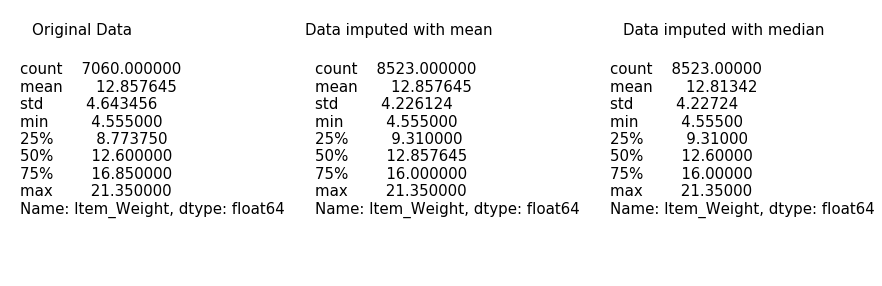

In [29]:
# import the required libraries 
from matplotlib import gridspec

# set the plot size
plt.rcParams["figure.figsize"] = [15,5]

# specify the geometry of the grid that a subplot is placed in
# split the plot into 2 rows and 3 columns
gs = gridspec.GridSpec(2, 3, width_ratios=[.5, .5, .5], height_ratios=[2,15])

# text

# step 1: specify the plot location by calling 'gs' initiated above 
# step 2: write the plot text
#  write the text in the plot using text()
#  x: location on x-axis where the text the is to be written
#  y: location on y-axis where the text the is to be written
#  s: text to be written 
#  fontsize: set the font size
# step 3: use .axis('off') to hide the x and y axes

# plot in 1st row and 1st column
a11 = plt.subplot(gs[0, 0])                                      
a11.text(x = 0.1, y = 0.03, s="Original Data", fontsize=15)  
a11.axis('off')

# plot in 1st row and 2nd column
a12 = plt.subplot(gs[0, 1])                                      
a12.text(x = 0.01, y = 0.03, s="Data imputed with mean", fontsize=15)  
a12.axis('off')

# plot in 1st row and 3rd column
a12 = plt.subplot(gs[0, 2])                                      
a12.text(x = 0.1, y = 0.03, s="Data imputed with median", fontsize=15)  
a12.axis('off')

# SUMMARY STATISTICS
# step 1: specify the location of the plot by calling 'gs' initiated above 
# step 2: specify the text along with its location
# step 3: use .axis('off') to hide the x and y axes

# plot in 2nd row and 1st column
# original data
a12 = plt.subplot(gs[1, 0])
a12.text(0.05, .3, s=str(df_sales["Item_Weight"].describe()), fontsize=15)
a12.axis('off')

# plot in 2nd row and 2nd column
# fill the missing values with mean
# obtain the mean of the data
mu = df_sales["Item_Weight"].mean()
a12 = plt.subplot(gs[1, 1])
a12.text(0.05, 0.3, s=str(df_sales["Item_Weight"].fillna(mu).describe()), fontsize=15)
a12.axis('off')

# fill the missing values with mean
# obtain the mean of the data
me = df_sales["Item_Weight"].median()
a12 = plt.subplot(gs[1, 2])
a12.text(0.05, 0.3, s=str(df_sales["Item_Weight"].fillna(me).describe()), fontsize=15)
a12.axis('off')

# display the plot
plt.show()

We see there is not much difference in the summary statistics of the variable. However, when the missing values are replaced with mean, the mean of the original data is retained and there is a slight change in the median value. And when the missing values are replaced with median, the median of the original data is retained and there is a slight change in the mean value.

So we can replace missing data with either mean or median. We shall replace all the values with the median

In [30]:
# fill the missing values with median
# inplace: makes permanent changes in the dataframe
df_sales["Item_Weight"].fillna(me, inplace = True)

In [31]:
# display the summary 
df_sales["Item_Weight"].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

### 4. The variable `Item_Visibility`:

The variable represents the item visibility in the score.

In [32]:
# display the summary 
df_sales["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Replace all 0's with the mean of the observations.

In [33]:
# obtain the mean of the data
mu = df_sales["Item_Visibility"].mean()

# replace the value of 0 with mean
df_sales.Item_Visibility.replace(0, mu, inplace = True)

The values have been replaced check of the summary.

In [34]:
# display the summary 
df_sales["Item_Visibility"].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### We have imputed for all the missing values in the data. 

We will now do a recheck of the missing data.

In [35]:
# use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df_sales.isnull().sum()

# print the missing values
missing_values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

Let us plot a heatmap of the missing values.

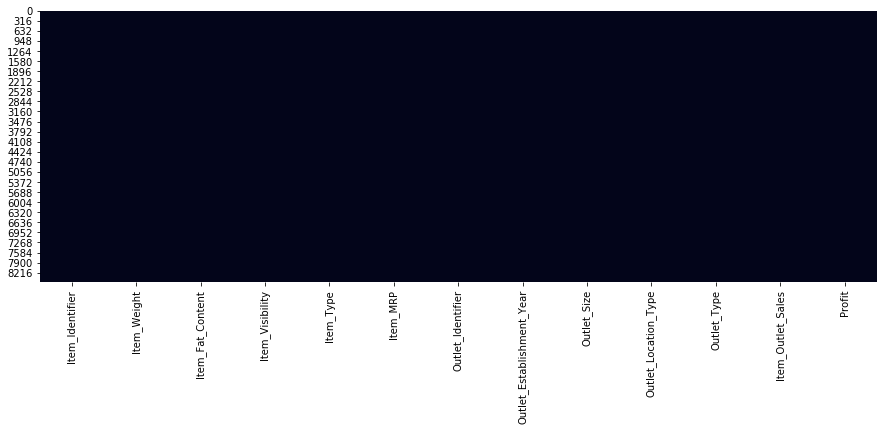

In [36]:
# let us plot a heatmap of the missing values

# import the required libraries
# import the library seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df_sales.isnull(), cbar = False)

# display the plot
plt.show()

**Interpretation:** We confirm that the data has no missing values.

<a id="cat"> </a>
# 3. Handle Non-Numeric Data

The data may contain numerical as well as categorical variables. Machine learning algorithms are designed to work with numerical data. Thus, it is necessary to convert the categorical variables into a numeric type. Different techniques are available to perform such conversion.

<a id="pandas"> </a>
## 3.1 One-Hot Encoding (Using Pandas)

It is used to create dummy variables from a single categorical variable. We can create a dummy variable corresponding to each level of the categorical variable. The dummy variable contains values as '0' and '1' based on the presence or absence of the category in the corresponding observation.

In [ ]:
# check the categories of the variable 'Item_Type' 



print('Categories in Item_Type:', df_sales.Item_Type.unique())

`Item_Type` is distributed in 16 different categories. To create 16 dummy variables corresponding to each category, perform one-hot encoding using `get_dummies` from pandas.

In [ ]:
# create dummy variables for 'Item_Type'
pd.get_dummies(df_sales, columns= ['Item_Type']).head()

We have created 16 dummy encoded variables from the categorical variable `Item_Type`. In the $1^{st}$ observation, value '1' is present in the column `Item_Type_Dairy	`, while all other dummy variables have value '0'.

#### We can also create n-1 dummy variables for the 16 categories in `Item_Type` using the `drop_first` parameter.

In [ ]:
# create dummy variables for 'Item_Type'
# 'drop_first = True' creates (n-1 = 15) dummy variables from (n = 16) categories 
pd.get_dummies(df_sales, columns= ['Item_Type'], drop_first = True).head()

The above data frame contains 15 dummy variables for 16 categories of `Item_Type`. The 0 indicates non-existance of the item type while 1 indicates existance of the item type.

<a id="onehot"> </a>
## 3.2 One-Hot Encoding (Using Sklearn)

sklearn also provides a function to perform a one-hot encoding of the categorical variable. Let us use 'OneHotEncoder' from skelarn to encode the variable `Outlet_Type`.

In [ ]:
# import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encode = OneHotEncoder()

# fit_transform: It returns a sparse array
# .toarray(): It returns a numpy array
df_encode = pd.DataFrame(encode.fit_transform(df_sales[['Outlet_Type']]).toarray(), columns = ['Grocery Store', 'Supermarket Type1', 
                                                                                         'Supermarket Type2', 'Supermarket Type3'])



# merge with main dataframe (df_sales)
df_encode = pd.concat([df_sales, df_encode], axis=1)

# print 20 rows of the data
df_encode.head()

<a id="label"> </a>
## 3.3 Label Encoding (Using Sklearn)

This technique labels each of the categories of the variable with values between 0 and (n-1), where 'n' is the number of distinct categories in the variable.

#### Use 'LabelEncoder' from sklearn to encode the variable `Outlet_Size`.

In [ ]:
# check the categories in 'Outlet_Size'
df_sales.Outlet_Size.unique()

In [ ]:
# we can not perform encoding with the variable which has missing value 
# convert the data type into string
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].astype(str)

Now, the missing values will be considered as a separate category alongside other categories (Medium, High, Small) in the variable.

In [ ]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
df_sales['Label_Encoded_Outlet_Size'] = labelencoder.fit_transform(df_sales.Outlet_Size)

# display first 5 observations
df_sales.head()

LabelEncoder has encoded the four outlet size. This method is not always useful because it assigns the order to the categories in an alphabetical manner.

<a id="ord"> </a>
## 3.4 Ordinal Encoding (Using Sklearn)

Ordinal encoding can be used to encode the ordinal variable with the values from 0 to (n-1) for 'n' distinct categories. We can pass the order to the encoder to assign the categories in the variable. We encode the variable `Outlet_Size` using OrdinalEncoder.

In [ ]:
# import the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["Small", "Medium", "High", "nan"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
df_sales['Order_Outlet_Size'] = orderencoding.fit_transform(df_sales['Outlet_Size'].values.reshape(-1,1))

# display the data
df_sales.head()

<a id="freq"> </a>
## 3.5 Frequency Encoding (Using Sklearn)

Frequency encoding is used to encode the values with the frequency of each category of the categorical variable. This method is not useful if the categories have the same frequency; as the encoded column will contain the same value for all the observations. 

#### Encode the variable `Item_Type` with the frequency of each category.

In [ ]:
# frequency encoding on 'Item_Type'
# size of each category
encoding = df_sales.groupby('Item_Type').size()

# get frequency of each category
encoding = encoding/len(df_sales)

# encode the column
# map(): apply encoding to each item in the variable
# and multiply by 100
df_sales['Freq_Encoded_Item_Type'] = df_sales.Item_Type.map(encoding)*100

# print first five rows of the data
df_sales.head()

In [ ]:
# create a dataframe for 'Item_Type' and its corresponding frequency encoding
# .unique(): to get the unique values
pd.DataFrame(df_sales['Item_Type'].unique(), df_sales['Freq_Encoded_Item_Type'].unique(), columns= ['Item_Type'])

**Interpretation:** From the above result,for all categories in the variable we get the percentage of occurrence for that specific category.
The 'Fruits and Vegetables', 'Household', 'Snack Foods', and 'Frozen Foods' have the highest proportion among all the products.

<a id="norm"> </a>
# 4. Scale the Data

The data may contain the variables of the different numerical scale. We scale the variable to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others. Here, we study two techniques to normalize the data.

<a id="stdscale"> </a>
## 4.1 StandardScaler

The StandardScaler() is present in the sklearn library that normalizes the data such that the mean is zero and standard deviation is 1. This method does not change the shape of the original distribution.

Check the minimum and maximum values of the product sales.

In [ ]:
# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df_sales['Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", df_sales['Item_Outlet_Sales'].max())

Standardize the variable to reduce the scale of the data.

In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df_sales['Scaled_Item_Outlet_Sales'] = standard_scale.fit_transform(df_sales[['Item_Outlet_Sales']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df_sales['Scaled_Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", df_sales['Scaled_Item_Outlet_Sales'].max())

Plot the distribution plots to visualize the data.

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of original variable
# axlabel: label the x-axis
sns.distplot(df_sales['Item_Outlet_Sales'])
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Item Outlet Sales', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use second column for plotting
plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.distplot(df_sales['Scaled_Item_Outlet_Sales'])
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Scaled Item Outlet Sales', fontsize=15)
# display the plot
plt.show()

**Interpretation:** The above subplots show that the distribution of the scaled and unscaled data is the same. But, the range of values is changed from (33.29, 13086.96) to (-1.26, 6.39).

Check the mean and standard deviation of the scaled data.

In [ ]:
# check the mean and standard deviation of the scaled variable
print("The mean of the scaled variable:", df_sales['Scaled_Item_Outlet_Sales'].mean(),"\n",
      "The standard deviation of the scaled variable:", df_sales['Scaled_Item_Outlet_Sales'].std())

**Interpretation:** It shows that the transformed data has mean = 0 and standard deviation = 1

<a id="minmax"> </a>
## 4.2 Min-Max Normalization

Min-max normalization is another method to normalize the data. It performs a linear transformation on the data. The normalized values will be between 0 and 1. Use the 'MinMaxScaler' from sklearn to normalize the variable.

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df_sales['minmax_Item_Outlet_Sales'] = min_max.fit_transform(df_sales[['Item_Outlet_Sales']])

# minimum and maximum value of the normalized variable
df_sales['minmax_Item_Outlet_Sales'].min(), df_sales['minmax_Item_Outlet_Sales'].max()

**Interpretation:** The range of `Item_Outlet_Sales` has changed from (33.29, 13086.9648) to (0,1).

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of original variable
# axlabel: label the x-axis
sns.distplot(df_sales['Item_Outlet_Sales'], axlabel='Item Outlet Sales')
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Item Outlet Sales', fontsize=15)

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.distplot(df_sales['minmax_Item_Outlet_Sales'], axlabel='Scaled Item Outlet Sales')
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Scaled Item Outlet Sales', fontsize=15)

# display the plot
plt.show()

**Interpretation:** Normalization is useful when the data has varying scales.

<a id="trans"> </a>
# 5. Transformation Techniques

Different kinds of transformations can be applied to the data to change the data in the required scale or shape. Here, we learn the two transformation techniques - Log transformation and Exponential transformation.

<a id="log"> </a>
## 5.1 Log Transformation

We have seen types of skewness that may be present in the data. Log transformation can be applied to reduce such skewness. If the data values are increasing at an exponential rate, then log transformation can transform the values such that the values will increase linearly.

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# check the distribution of sales of the product
# ax: create an axes object in the figure
ax = sns.distplot(df_sales['Item_Outlet_Sales'])

# set the label for x-axis
ax.set_xlabel('Sales of the Product', fontsize=15)

# coefficient of skewness 
print('Skewness:', df_sales['Item_Outlet_Sales'].skew())

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** It can be seen that the variable is positively skewed with the coefficient of skewness as 1.177. Apply the log transformation to reduce the skewness in the data.

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# apply natural log transformation (with base 'e')
np.log(df_sales['Item_Outlet_Sales'])

# coefficient of skewness of transformed data
print('Skewness:', np.log(df_sales['Item_Outlet_Sales']).skew())

# distribution of log_transformed variable
# ax: create an axes object in the figure
ax = sns.distplot(np.log(df_sales['Item_Outlet_Sales']))

# set the label for x-axis
ax.set_xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

The coefficient of skewness of the log_transformed data is near zero (-0.89). The distribution plot of the transformed variable is also more interpretable than the plot with original values.

<a id="expo"> </a>
## 5.2 Exponential Transformation

It is inverse of the log transformation. In the analysis, we sometimes may need to change the data to log scale; but for the final interpretation, we need the data in original units. In such cases, exponential transformation is used to take the 'anti-log' of the log-transformed values to get the values on the original scale.

Consider the log-transformed values of `Item_Outlet_Sales`.

In [ ]:
# log_transformed values
log_Item_Outlet_Sales =  np.log(df_sales['Item_Outlet_Sales'])

# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# plot the distribution
# ax: create an axes object in the figure
ax = sns.distplot(log_Item_Outlet_Sales)

# set the title
plt.title("Log Transformed Item Outlet Sales", fontsize=15)

# set the label for x-axis
ax.set_xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** In the above plot, x-axis represents the values of outlet sales in the log scale. We want the values on the original scale. Thus, use the exponential transformation to convert the values to the original scale.

In [ ]:
# anti-log of 'log_Item_Outlet_Sales'
Exp_Item_Outlet_Sales = np.exp(log_Item_Outlet_Sales)

# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# plot the distribution
# ax: create an axes object in the figure
ax = sns.distplot(Exp_Item_Outlet_Sales)

# set the title
plt.title('Exponential Transformation', fontsize=15)

# set the label for x-axis
ax.set_xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

In [ ]:
# statistical summary of the data
Exp_Item_Outlet_Sales.describe()

After the exponential transformation, we have obtained the values for `Item_Outlet_Sales` in the original units.

#### Let us plot the original values for `Item_Outlet_Sales`, log-transformed `Item_Outlet_Sales`, and exponontial of log-transformed `Item_Outlet_Sales`.

In [ ]:
# set the figure size
plt.figure(figsize=(15,8))

# subplot is used to create a set of plots
# we create a subplot of 1 rows by 3 columns 
# use first column for plotting
plt.subplot(1,3,1)

# plot the distribution of original data
sns.distplot(df_sales['Item_Outlet_Sales'])
# set label for x-axis
plt.xlabel('Item Outlet Sales', fontsize=12)
# set label for y-axis
plt.ylabel('Density', fontsize=15)

# we create a subplot of 1 row by 3 columns 
# use second column for plotting
plt.subplot(1,3,2)

# plot the distribution of log-transformed data
sns.distplot(np.log(df_sales['Item_Outlet_Sales']))

# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Log Transformed of Item Outlet Sales', fontsize=12)

# we create a subplot of 1 row by 3 columns 
# use third column for plotting
plt.subplot(1,3,3)

# plot the distribution of the data after taking exponential of log-transformed data
sns.distplot(Exp_Item_Outlet_Sales)
# set label for x-axis
plt.xlabel('Exponential of Log Transformed Item Outlet Sales', fontsize=12)
# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** It can be observed that the distribution after the exponential transformation of the log-transformed data is the distribution of the original data. Taking the exponential is equivalent to the anti-log of the log-transformed data.

**Remark:**  However, note that to reduce skewness taking transformation may not be feasible always. One can also try to reduce skewness by removing the outliers. The outlier treatment shall be dealt with the later session.

<a id="outliers"></a>
# 6. Outliers

An outlier is an observation in the data that lies at an abnormal distance from other values. Presence of an outlier may skew the results. Hence it is necessary to remove them.

<a id="boxplot"></a>
## 6.1 Based on Boxplots:

The boxplot() in seaborn plots a box plot of the specified data. The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution. The points that are determined to be outliers are identified using  the interquartile range (IQR) method.

The next section deals with IQR method.

In [37]:
# filter the numeric variables from the data
df_num = df_sales.select_dtypes(include = np.number)

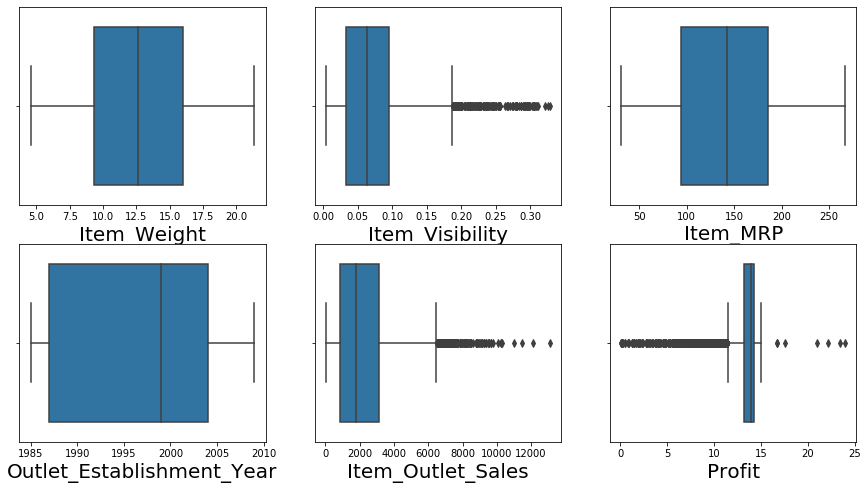

In [38]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

**Interpretation:** Out of the six numeric variables, variables `Item_visibility`, `Item_Outlet_Sales` and `Profit` have outliers.

<a id="iqr"></a>
## 6.2. Based on IQR

In [39]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Item_Weight                     6.6900
Item_Visibility                 0.0615
Item_MRP                       91.8500
Outlet_Establishment_Year      17.0000
Item_Outlet_Sales            2267.0490
Profit                          1.1500
dtype: float64


In [40]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df_sales_iqr = df_sales[~((df_sales < (Q1 - 1.5 * IQR)) |(df_sales > (Q3 + 1.5 * IQR))).any(axis=1)]

The above DataFrame `df_sales_iqr` has outliers removed and can be further used for analysis. However, it is always a good practice to confirm whether the outliers are removed or not.

In order to check, whether the outliers are removed, let us first check the shape of the data.

In [41]:
# check the shape of the data
df_sales_iqr.shape

(7487, 13)

**Interpretation:** We see that the number of observations (rows) is reduced.

Let us plot the boxplot for the three variables (containing outliers again)

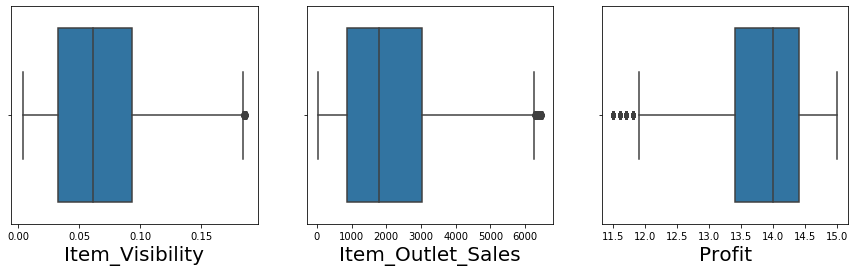

In [42]:
# consider the variables which has outliers
variables = ['Item_Visibility', 'Item_Outlet_Sales', 'Profit']

# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label
for variable, subplot in zip(df_sales_iqr[variables], ax.flatten()):
    z = sns.boxplot(x=df_sales_iqr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

**Interpretation:** The outliers have been removed and the data can be used for analysis. However, note there are some more outliers present in the data. These outliers are based on the new IQR and are not removed. 

<a id="zscore"></a>
## 6.3 Based on Z-score

Z-score of a value is the difference between that value and the mean, divided by the standard deviation. If the z-score greater than 3 or less than -3, indicates an outlier value.

In [43]:
# import library scipy
import scipy
# from scipy import the module stats
from scipy import stats

# z-scores are defined for each observation in a variable
# compute the z-scores using the method zscore from the scipy library 
z_scores_Profit = scipy.stats.zscore(df_num["Profit"])

# display the z-scores
z_scores_Profit

array([-1.12503308,  0.52034176,  0.63786854, ..., -2.30030082,
        0.46157837,  0.69663192])

In [44]:
# print the rows where z-score is less than -3
row_index_less = np.where(z_scores_Profit < -3)

# print the values
print(row_index_less)

(array([  41,   50,  144,  217,  320,  324,  406,  425,  432,  457,  546,
        602,  607,  611,  641,  716,  761,  816,  892,  921,  926,  957,
        960,  986, 1066, 1133, 1178, 1212, 1237, 1304, 1409, 1459, 1533,
       1551, 1561, 1582, 1623, 1645, 1649, 1659, 1669, 1715, 1784, 1788,
       1805, 1816, 1835, 1867, 1893, 1900, 1916, 1956, 1974, 1984, 1989,
       2000, 2019, 2060, 2062, 2130, 2201, 2224, 2246, 2289, 2332, 2338,
       2425, 2449, 2477, 2510, 2515, 2526, 2537, 2543, 2572, 2636, 2792,
       2836, 2919, 2925, 2969, 2987, 2992, 2996, 3025, 3035, 3098, 3105,
       3223, 3254, 3296, 3356, 3415, 3416, 3476, 3513, 3619, 3668, 3675,
       3759, 3785, 3849, 3852, 3904, 3917, 3932, 3936, 3990, 4073, 4091,
       4146, 4197, 4213, 4407, 4487, 4493, 4556, 4571, 4705, 4721, 4724,
       4764, 4800, 5049, 5127, 5231, 5274, 5286, 5313, 5336, 5378, 5516,
       5540, 5657, 5658, 5728, 5730, 5750, 5788, 5883, 5891, 5906, 5971,
       5987, 6093, 6137, 6211, 6247, 6271, 6372, 6

**Interpretation:** The rows corresponding to the above displayed index are the outliers for the data.

In [45]:
# print the rows where z-score is more than 3
row_index_more = np.where(z_scores_Profit > 3)

# print the values more than the 
print(row_index_more)

(array([3026, 4386, 5089, 8369]),)


**Interpretation:** The rows corresponding to the above displayed index are the outliers for the data.

In [46]:
# count of outliers in the variable representing profit
len(row_index_less[0]) + len(row_index_more[0])

199

**Interpretation:** There are 199 outliers in the data.

In [47]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
df_sales_zscore = df_sales["Profit"][~(( z_scores_Profit < -3) |(z_scores_Profit > 3))]

In [48]:
# check the shape 
df_sales_zscore.shape

(8324,)

<a id="scatter"></a>
## 6.4 Based on Scatter Plots


A scatter plot is primarily used to observe and showcase relationships between two numeric variables. They showcase the trends and patterns such as: positive, negative, linear or nonlinear. However, scatter plots can also be used to identify outliers.

<br>
We shall now plot a scatter plot between variables profit and outlet sales.

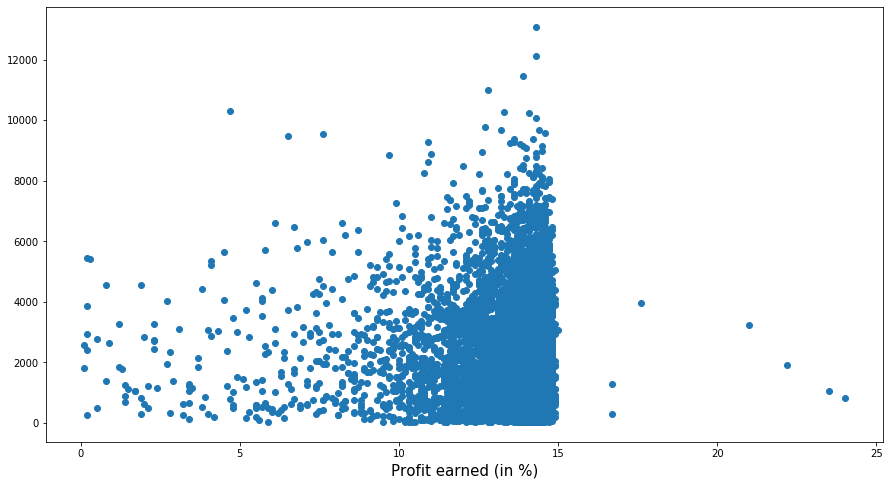

In [49]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df_sales["Profit"], df_sales["Item_Outlet_Sales"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("Profit earned (in %)", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('')
plt.show()

**Interpretation:** The values to the right of the graph beyond 15% of the profit earned can be considered as outliers.

In [50]:
# include values having points less than 15
df_sales_scatterplot = df_sales[df_sales["Profit"]<15]

Now let us plot the scatter plot of the data with no outliers.

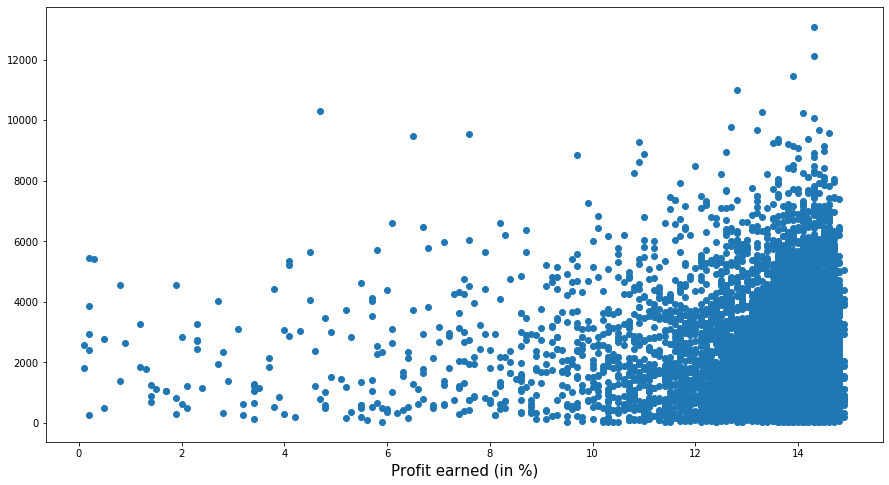

In [51]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df_sales_scatterplot["Profit"], df_sales_scatterplot["Item_Outlet_Sales"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("Profit earned (in %)", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('')
plt.show()

<a id="feature_engineering"></a>
# 7. Feature Engineering




1. Let us determine the age of the outlet in the dataset.

In [52]:
# import the required libraries
import datetime
from datetime import date

# get the current year
# today(): gives today's date
# year: gives the current year
current_year = date.today().year

df_sales["Age_Outlet"] = current_year - df_sales["Outlet_Establishment_Year"]

In [53]:
# display head of the data
df_sales.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Age_Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,21


2. Create a new variable representing the food type

In [54]:
# extract the first two letter of 'Item_Identifier'
# apply: applies a function along an axis of the DataFrame
# lambda: creates a small, one-time, anonymous function to extract the first two letters 
# indexing in python begins with 0
df_sales['Product_type'] = df_sales['Item_Identifier'].apply(lambda x: x[0:2])

# rename the categories 
# map: maps the category names to the identifier codes
df_sales['Product_type'] = df_sales['Product_type'].map({'FD':'Food','NC':'Non-Consumable', 'DR':'Drinks'})

# display the counts
df_sales['Product_type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Product_type, dtype: int64

Display the head of the data again to ensure the variable is added.

In [55]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Age_Outlet,Product_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,21,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,11,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,21,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,22,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,33,Non-Consumable


<a id="train_test_split"></a>
# 8. Introduction to Train and Test split



Split the data into the train and test sets.

In [56]:
#import the sklearn library
import sklearn

# import the train_test_split module from sklearn 
from sklearn.model_selection import train_test_split

In [57]:
# select the target variable
Y = df_sales['Item_Outlet_Sales']

# select all the independent variables
# by dropping the target variable
X = df_sales.drop(['Item_Outlet_Sales'], axis = 1)

In [58]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",Y_train.shape)

# print the shape of 'y_test'
print("Y_test ",Y_test.shape)

X_train  (6392, 14)
X_test  (2131, 14)
Y_train  (6392,)
Y_test  (2131,)


Thus we get our train and test split. Also ensure the train test split are passed in the order - X_train, X_test, Y_train, Y_test - to get the correct split.